# Telecom_Customer Churn Prediction

The target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned.

**Target_variable - churn or not**

In [1]:
#importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [3]:
churn_data.shape

(7042, 9)

In [4]:
customer_data.shape

(7042, 5)

In [5]:
internet_data.shape

(7042, 9)

# Merging datasets

In [6]:
# checking unique values
common_lst = []

for col in churn_data.columns:                                               # Find common columns in Inpatient and Outpatient Data
    if col in customer_data.columns:
        common_lst.append(col)                                                  # Add the common columns in new list

print(common_lst)

['customerID']


In [7]:
data_1 = pd.merge(churn_data, customer_data, on = "customerID")

In [8]:
telecom = pd.merge(internet_data, data_1, on = "customerID")

In [9]:
telecom.shape

(7042, 21)

In [10]:
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,1,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,34,...,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,2,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,2,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [11]:
telecom.dtypes

customerID           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
dtype: object

In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   MultipleLines     7042 non-null   object 
 2   InternetService   7042 non-null   object 
 3   OnlineSecurity    7042 non-null   object 
 4   OnlineBackup      7042 non-null   object 
 5   DeviceProtection  7042 non-null   object 
 6   TechSupport       7042 non-null   object 
 7   StreamingTV       7042 non-null   object 
 8   StreamingMovies   7042 non-null   object 
 9   tenure            7042 non-null   int64  
 10  PhoneService      7042 non-null   object 
 11  Contract          7042 non-null   object 
 12  PaperlessBilling  7042 non-null   object 
 13  PaymentMethod     7042 non-null   object 
 14  MonthlyCharges    7042 non-null   float64
 15  TotalCharges      7042 non-null   object 
 16  Churn             7042 non-null   object 


In [13]:
telecom.isnull().sum()

customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

In [14]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [15]:
#converting categorical to numerical by replacing yes and no by 1 and 0
telecom['Churn'].replace(['Yes', 'No'],[1, 0], inplace=True)

In [16]:
#to know the number of numerical and categorical features
num_data = telecom.select_dtypes(exclude='object')
cat_data = telecom.select_dtypes(include='object') 

In [17]:
Corr_b=num_data.corr()

<AxesSubplot:>

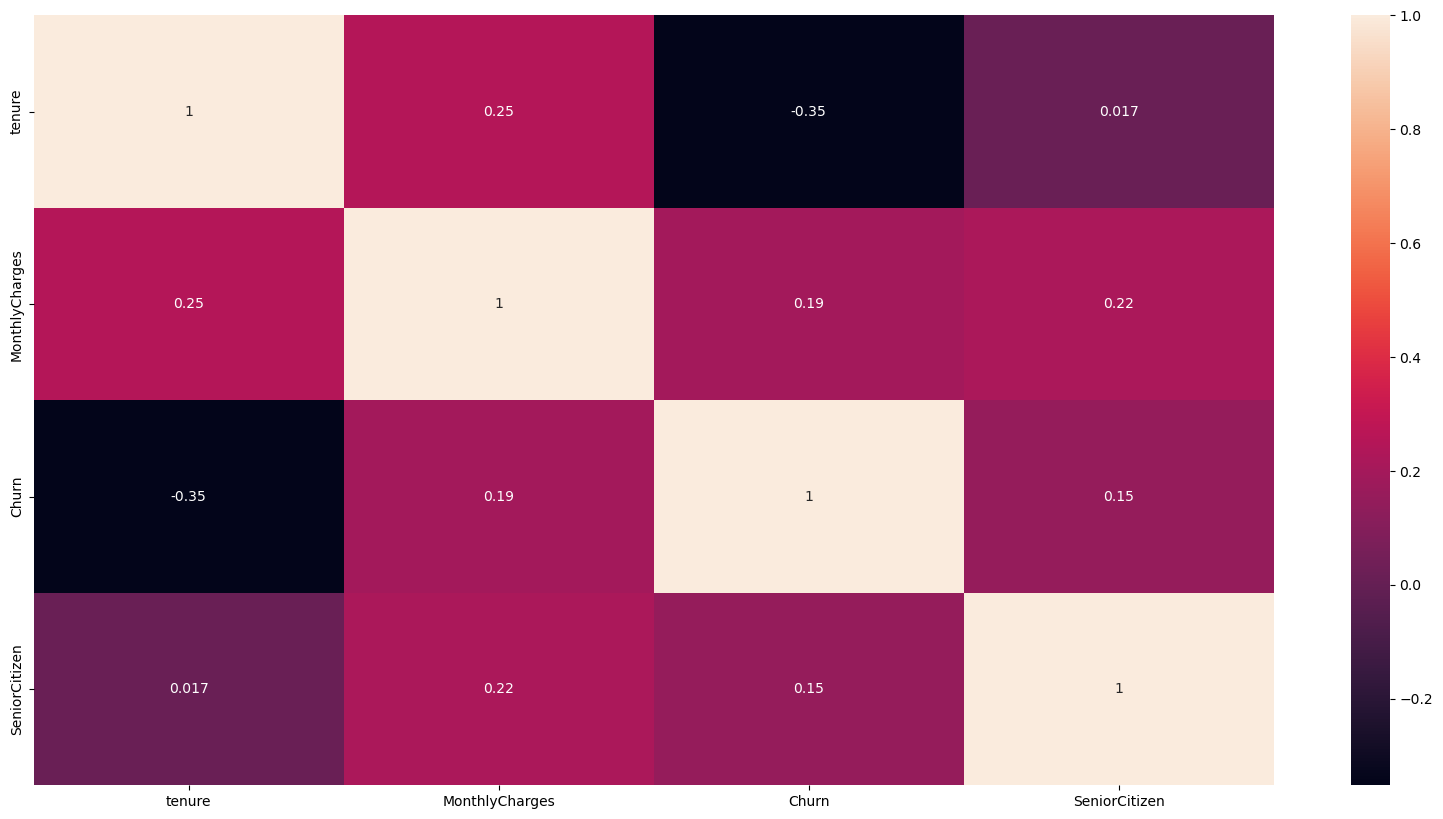

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(Corr_b,annot=True)

In [19]:
num_data.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen
0,1,29.85,0,0
1,34,56.95,0,0
2,2,53.85,1,0
3,45,42.30,0,0
4,2,70.70,1,0


In [20]:
cat_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,Contract,PaperlessBilling,PaymentMethod,TotalCharges,gender,Partner,Dependents
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,Female,Yes,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Yes,One year,No,Mailed check,1889.5,Male,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,108.15,Male,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,One year,No,Bank transfer (automatic),1840.75,Male,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,151.65,Female,No,No


In [21]:
for i in telecom.columns:
    if i in cat_data:
        results = telecom[i].value_counts()
        print(results, "\n")
        print("-/"*20, "\n")

7590-VHVEG    1
7036-ZZKBD    1
5956-YHHRX    1
5365-LLFYV    1
5855-EIBDE    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
8361-LTMKD    1
Name: customerID, Length: 7042, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

No                  3389
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

Fiber optic    3095
DSL            2421
No             1526
Name: InternetService, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

No                     3498
Yes                    2018
No internet service    1526
Name: OnlineSecurity, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

No                     3087
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

No                     3095
Yes                    2421
No internet service    1526
Name: DeviceProtection, dtype

In [22]:
#categorical columns converting using get_dummies
telecom = pd.get_dummies(telecom, columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PhoneService','Contract','PaperlessBilling','PaymentMethod','gender','Partner','Dependents'])

In [23]:
telecom

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
1,5575-GNVDE,34,56.95,1889.5,0,0,1,0,0,1,...,0,0,0,1,0,1,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,1,0,1,0,0,1,...,0,0,0,1,0,1,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,0,0,1,0,1,...,1,0,0,0,0,1,1,0,1,0
4,9237-HQITU,2,70.70,151.65,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,21.15,1419.4,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
7038,6840-RESVB,24,84.80,1990.5,0,0,0,0,1,1,...,0,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,103.20,7362.9,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
7040,4801-JZAZL,11,29.60,346.45,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,1


In [24]:
telecom.dtypes

customerID                                  object
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
SeniorCitizen                                int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                              uint8
OnlineBackup_No internet service             uint8
OnlineBackup_Yes                             uint8
DeviceProtection_No                          uint8
DeviceProtection_No internet se

 The "errors" parameter is set to 'coerce', which means that if there are any non-numeric values in the "TotalCharges" column, they will be converted to NaN (Not a Number) values instead of throwing an error.

In [25]:
# Converting Total Charges to a numerical data type.
telecom.TotalCharges = pd.to_numeric(telecom.TotalCharges, errors='coerce') 

In [26]:
telecom.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
1,5575-GNVDE,34,56.95,1889.50,0,0,1,0,0,1,...,0,0,0,1,0,1,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,1,0,1,0,0,1,...,0,0,0,1,0,1,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,0,0,1,0,1,...,1,0,0,0,0,1,1,0,1,0
4,9237-HQITU,2,70.70,151.65,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [27]:
telecom.isnull().sum()

customerID                                  0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
SeniorCitizen                               0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service            0
OnlineBackup_Yes                            0
DeviceProtection_No                         0
DeviceProtection_No internet service        0
DeviceProtection_Yes                        0
TechSupport_No                    

In [28]:
# Filling the feature 'TotalCharges' with the median of it's values.
telecom['TotalCharges'] = telecom['TotalCharges'].fillna(telecom['TotalCharges'].mean())

In [29]:
telecom.isnull().sum()

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
SeniorCitizen                              0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSuppor

In [30]:
telecom.Churn.value_counts()

0    5173
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

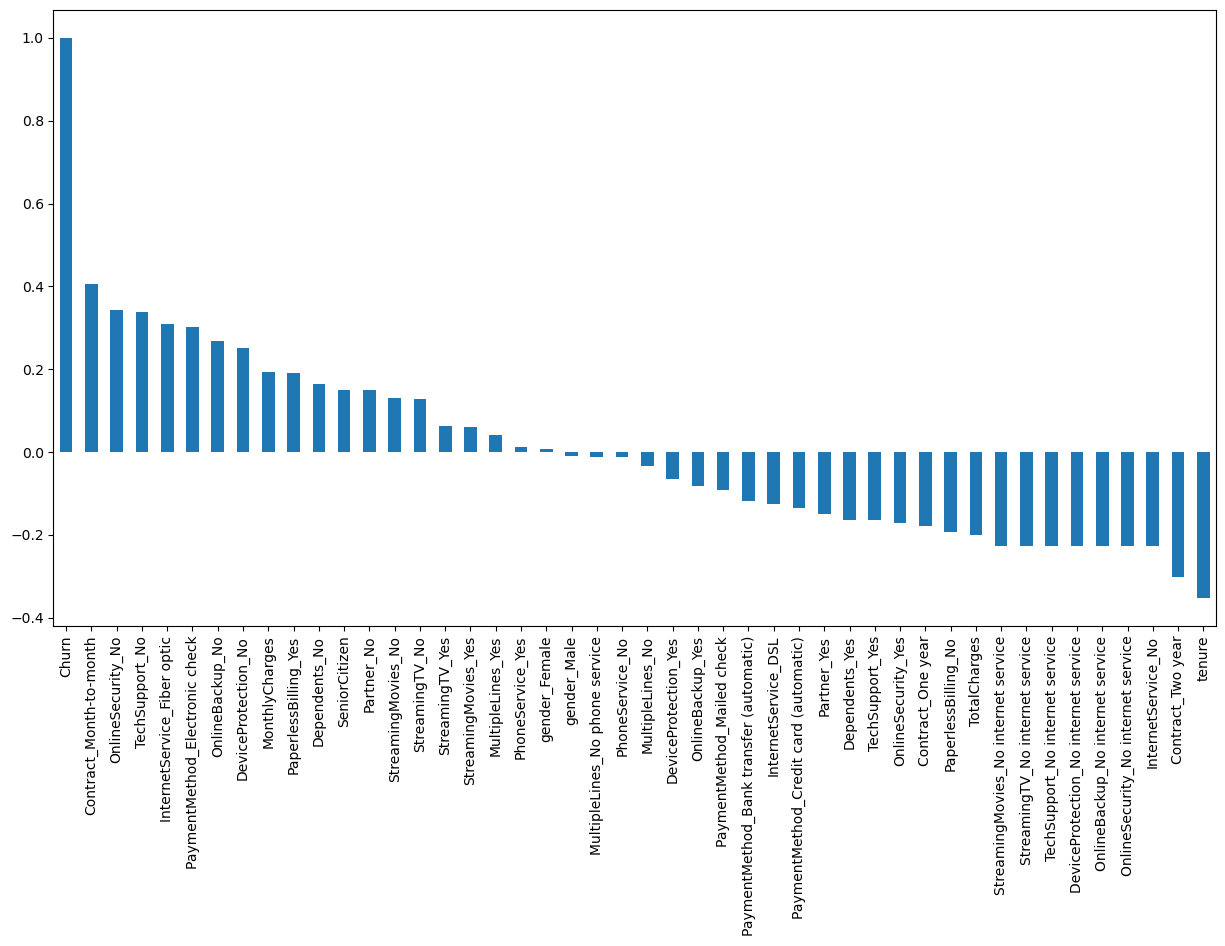

In [31]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
telecom.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

In [32]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Train_Test_Split

In [33]:
X = telecom.drop(['Churn'], axis=1)
y = telecom['Churn']

In [34]:
# Split the data into training and testing sets
train = telecom.sample(frac=0.8, random_state=42)
test = telecom.drop(train.index)

In [35]:
# Split the training and testing data into features and labels
X_train = train.drop(['customerID', 'Churn'], axis=1).values
y_train = train['Churn'].values
X_test = test.drop(['customerID', 'Churn'], axis=1).values
y_test = test['Churn'].values

In [36]:
# create an instance of the StandardScaler
scaler = StandardScaler()

# fit the scaler to your data
scaler.fit(X_train)

# transform your data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model

In [37]:
class NaiveBayes:
    def __init__(self):
        self.prior_probs = {}
        self.likelihood_probs = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        # Compute prior probabilities
        for c in self.classes:
            self.prior_probs[c] = np.sum(y == c) / n_samples

        # Compute likelihood probabilities
        for c in self.classes:
            X_c = X[y == c]
            self.likelihood_probs[c] = (X_c.sum(axis=0) + 1) / (np.sum(X_c) + n_features)

    def predict(self, X):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.prior_probs[c])
            likelihood = np.log(self.likelihood_probs[c])
            posterior = np.sum(likelihood * X, axis=1) + prior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]
    
def accuracy_score(y_true, y_pred):
        
        accuracy = np.sum(y_true == y_pred)/len(y_true) *100
        return accuracy

In [38]:
nb = NaiveBayes()
nb.fit(X_train_scaled,y_train)
predictions = nb.predict(X_test_scaled)
#predictions=predictions.reshape(-1,1)
print("Naive Bayes classification accuracy ",accuracy_score(y_test,predictions))

Naive Bayes classification accuracy  74.7159090909091


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_16688\3642960138.py:23: RuntimeWarning: invalid value encountered in log
  likelihood = np.log(self.likelihood_probs[c])


# Hyperparameter Tuning

In [39]:
def cross_val_score(nb, X, y, k=5):
    scores = []
    n = len(y)
    idx = np.arange(n)
    np.random.shuffle(idx)
    for i in range(k):
        test_idx = idx[int(i * n / k):int((i + 1) * n / k)]
        train_idx = np.concatenate([idx[:int(i * n / k)], idx[int((i + 1) * n / k):]])
        X_train_scaled, y_train = X[train_idx], y[train_idx]
        X_test_scaled, y_test = X[test_idx], y[test_idx]
        nb.fit(X_train_scaled, y_train)
        y_pred = nb.predict(X_test_scaled)
        scores.append(accuracy_score(y_test, y_pred))
    return np.mean(scores)

In [40]:
best_score = 0
best_alpha = None

for alpha in [0.1, 0.01, 0.001]:
    nb = NaiveBayes()
    scores = cross_val_score(nb, X_train_scaled, y_train, k=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

# Train and evaluate the model with the best hyperparameters
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"best_alpha: {best_alpha}")
print(f"best_score: {best_score}")

Accuracy: 74.7159090909091
best_alpha: 0.01
best_score: 73.14524326990816


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_16688\3642960138.py:23: RuntimeWarning: invalid value encountered in log
  likelihood = np.log(self.likelihood_probs[c])
